In [4]:
# EDA pamages 
import pandas as pd

#hide earrings 
import warnings
warnings.filterwarnings('ignore')
import numpy as np

# Data Viz pakages
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("C:\\Users\\haier\\Python\\TEXT_DATA_PREPROCESSING\\Data_sets\\subset_covid19_tweets.csv")

In [6]:
drop_unnamed = df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Coburg Consulting Group Ltd,"Nairobi, Kenya",Coburg Consulting Group (CCG) Limited was esta...,2020-06-23 05:23:23,118,143,40,False,2020-07-25 12:11:10,As Somalia heads to political campaign and lat...,NaN,Twitter Web App,False
496,Judy Cheesey,NaN,Call it as I see it.,2017-05-14 09:47:53,250,187,956,False,2020-07-25 12:11:10,@jjauthor Can someone give this twirp and his ...,['COVID19'],Twitter for iPhone,False
497,Mauricio Ramirez Villegas,República Dominicana,Cuenta oficial del Representante de Naciones U...,2020-02-10 21:08:02,254,675,542,False,2020-07-25 12:11:08,The @UN is helping families use the opportunit...,NaN,Twitter for iPhone,False
498,beingData,NaN,Reliable inductive reasoning,2015-01-27 19:31:31,6,59,1,False,2020-07-25 12:11:08,Spike in U.S. Cases Far Outpaces Testing Expan...,['COVID19'],Twitter for Android,False


In [8]:
df.index.name = 'S:no'  ; df.columns.name = 'Info'
df_rename = df.rename(columns=str.title)
fill_with_method = df.fillna(method='ffill',inplace=True) #this method keep pervious of column-value and past where na is writhen  

In [9]:
fill_with_values = df.fillna({'hashtags':'Zero'},inplace=True)

In [10]:
def get_convert_dtype(list_of_c_ids):
    for list_of_c_id in list_of_c_ids:
        df[list_of_c_id] = df[list_of_c_id].apply(pd.to_numeric)
        # convert just columns "a" and "b" df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)
        df[list_of_c_id] = df[list_of_c_id].astype(int)
get_convert_dtype(['user_followers', 'user_friends', 'user_favourites'])

In [11]:
df.dtypes

Info
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int32
user_friends         int32
user_favourites      int32
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [14]:
data = df.describe()

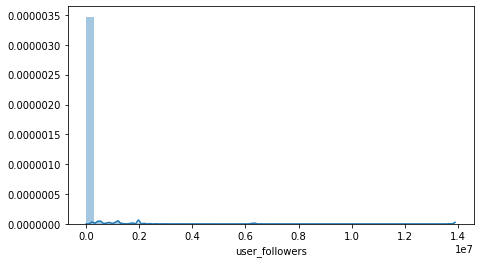

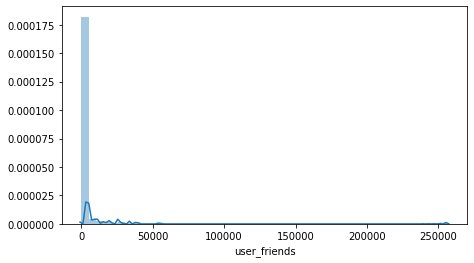

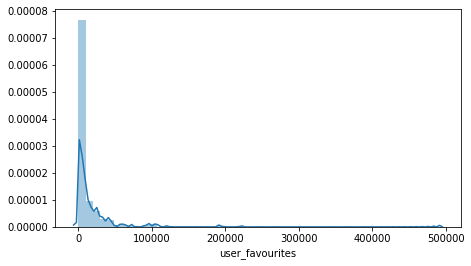

In [25]:
def plotvariable(data_f1,list_vars):
    for list_var in list_vars:
        plt.figure(figsize=(16,4))
        plt.subplot(1,2,1)
        #histogram
        sns.distplot(df[list_var])
plotvariable(df,['user_followers', 'user_friends', 'user_favourites'])

In [17]:
get_convert_dtype(['user_followers', 'user_friends', 'user_favourites'])

In [18]:
data

Info,user_followers,user_friends,user_favourites
count,5.000000e+02,500.000000,500.000000
mean,8.285120e+04,2562.412000,11229.806000
std,7.113861e+05,12563.676522,31756.974694
min,0.000000e+00,0.000000,0.000000
25%,1.717500e+02,165.500000,147.000000
50%,8.410000e+02,558.500000,1713.000000
75%,4.770250e+03,1617.500000,9773.250000
max,1.389280e+07,256510.000000,488878.000000


# z_score

In [27]:
def get_z_score(list_c_ids):
    for list_c_id in list_c_ids:
        df['z_score'] = (df[list_c_id] - df[list_c_id].mean())/df[list_c_id].std()
get_z_score(['user_followers','user_friends','user_favourites'])

In [28]:
df[df['z_score']>3]

Info,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,z_score
S:no,,,,,,,,,,,,,,
36,harleyb,Deep Heart Texas,Inquisitive; Open minded but clear-eyed; Unapo...,2014-02-03 01:23:36,6156,5463,193090,False,2020-07-25 12:26:06,@NicoleKowalski5 @chrisdameanor19 I'm feeling ...,['COVID19'],Twitter for Android,False,5.726622
41,Matthew McGee ⴵ 🌍🇪🇺🇬🇧🎭🎞📚,A UK I no longer recognise,"I am a man, and nothing human is alien to me. ...",2011-12-07 11:16:36,3113,3086,221545,False,2020-07-25 12:25:56,"Britain didn't understand #Covid19 for months,...",['Covid19'],Twitter for Android,False,6.622646
115,Public Health is the Economy,"Sarasota, FL",All the marketing or growth hacks in the world...,2016-08-12 20:39:08,10874,7330,488878,False,2020-07-25 12:23:53,@bubbaprog 350 school employees exposed to #CO...,['COVID19'],Twitter for Android,False,15.040734
144,Cesar H Hernandez,"Hanoi, Vietnam","Humanista Cristiano de izquierda. 💯% Humanist,...",2009-12-20 21:52:24,1334,726,190957,False,2020-07-25 12:23:04,@KGeorgieva @Lenin You're totally wrong. Ecuad...,"['Vietnam', 'covid19', 'coronavirus', 'ncov']",Twitter for Android,False,5.659456
313,Cindie Vaccaro 🇺🇸⚜🇮🇱,"Texas, USA #BackTheBlue",Christian|Mom|Conservative|Military|#NavyMom|#...,2011-12-15 23:09:26,25890,27074,107015,False,2020-07-25 12:17:21,@ckkirsch1 Comments on @andrewcuomo's mishandl...,['COVID19'],Twitter for Android,False,3.016194
368,Combative Firebrand,"North Shore, Boston","Journalist, Broadcaster, Policy Wonk, Educator...",2011-12-07 23:04:12,2729,4999,120801,False,2020-07-25 12:15:14,"@ggo0megaFAN @NikolovScience No, it is still a...","['Covid_19', 'COVID19']",Twitter for iPhone,False,3.450303


In [29]:
df[df['z_score'] < -3]

Info,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,z_score
S:no,,,,,,,,,,,,,,


In [30]:
df[(df['z_score'] > 3) | (df['z_score'] < -3)]

Info,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,z_score
S:no,,,,,,,,,,,,,,
36,harleyb,Deep Heart Texas,Inquisitive; Open minded but clear-eyed; Unapo...,2014-02-03 01:23:36,6156,5463,193090,False,2020-07-25 12:26:06,@NicoleKowalski5 @chrisdameanor19 I'm feeling ...,['COVID19'],Twitter for Android,False,5.726622
41,Matthew McGee ⴵ 🌍🇪🇺🇬🇧🎭🎞📚,A UK I no longer recognise,"I am a man, and nothing human is alien to me. ...",2011-12-07 11:16:36,3113,3086,221545,False,2020-07-25 12:25:56,"Britain didn't understand #Covid19 for months,...",['Covid19'],Twitter for Android,False,6.622646
115,Public Health is the Economy,"Sarasota, FL",All the marketing or growth hacks in the world...,2016-08-12 20:39:08,10874,7330,488878,False,2020-07-25 12:23:53,@bubbaprog 350 school employees exposed to #CO...,['COVID19'],Twitter for Android,False,15.040734
144,Cesar H Hernandez,"Hanoi, Vietnam","Humanista Cristiano de izquierda. 💯% Humanist,...",2009-12-20 21:52:24,1334,726,190957,False,2020-07-25 12:23:04,@KGeorgieva @Lenin You're totally wrong. Ecuad...,"['Vietnam', 'covid19', 'coronavirus', 'ncov']",Twitter for Android,False,5.659456
313,Cindie Vaccaro 🇺🇸⚜🇮🇱,"Texas, USA #BackTheBlue",Christian|Mom|Conservative|Military|#NavyMom|#...,2011-12-15 23:09:26,25890,27074,107015,False,2020-07-25 12:17:21,@ckkirsch1 Comments on @andrewcuomo's mishandl...,['COVID19'],Twitter for Android,False,3.016194
368,Combative Firebrand,"North Shore, Boston","Journalist, Broadcaster, Policy Wonk, Educator...",2011-12-07 23:04:12,2729,4999,120801,False,2020-07-25 12:15:14,"@ggo0megaFAN @NikolovScience No, it is still a...","['Covid_19', 'COVID19']",Twitter for iPhone,False,3.450303


In [31]:
#timinng
new_df = df[(df['z_score'] < 3) & (df['z_score'] > -3)]

In [32]:
new_df

Info,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,z_score
S:no,,,,,,,,,,,,,,
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,Zero,Twitter for iPhone,False,0.237592
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Zero,Twitter for Android,False,-0.352861
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,-0.125195
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,-0.306761
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,-0.350437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Coburg Consulting Group Ltd,"Nairobi, Kenya",Coburg Consulting Group (CCG) Limited was esta...,2020-06-23 05:23:23,118,143,40,False,2020-07-25 12:11:10,As Somalia heads to political campaign and lat...,['COVID19'],Twitter Web App,False,-0.352357
496,Judy Cheesey,"Nairobi, Kenya",Call it as I see it.,2017-05-14 09:47:53,250,187,956,False,2020-07-25 12:11:10,@jjauthor Can someone give this twirp and his ...,['COVID19'],Twitter for iPhone,False,-0.323513
497,Mauricio Ramirez Villegas,República Dominicana,Cuenta oficial del Representante de Naciones U...,2020-02-10 21:08:02,254,675,542,False,2020-07-25 12:11:08,The @UN is helping families use the opportunit...,['COVID19'],Twitter for iPhone,False,-0.336550


In [35]:
def plotvariable(data_f1,list_vars):
    for list_var in list_vars:
        plt.figure(figsize=(16,4))
        plt.subplot(1,2,1)
        #histogram
        sns.distplot(new_df[list_var])

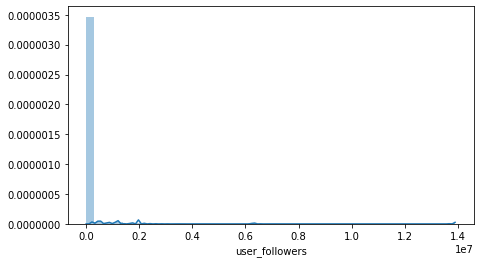

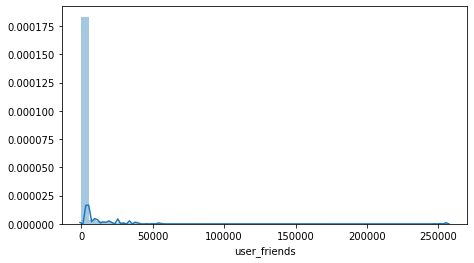

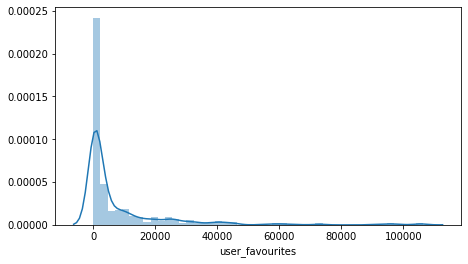

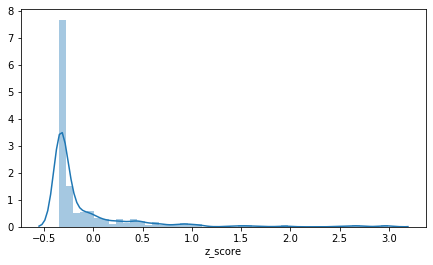

In [36]:
plotvariable(new_df,['user_followers', 'user_friends', 'user_favourites','z_score'])